In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random

In [2]:
!sed -i 's/archive.ubuntu.com/ftp.daumkakao.com/g' /etc/apt/sources.list
!apt-get update 
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm -rf ~/.cache/matplotlib/*
plt.rc('font', family='NanumBarunGothic') 
!pip install openpyxl

Hit:1 http://security.debian.org/debian-security buster/updates InRelease
Hit:2 http://deb.debian.org/debian buster InRelease
Get:3 http://deb.debian.org/debian buster-updates InRelease [51.9 kB]
Fetched 51.9 kB in 1s (49.5 kB/s)   
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-1).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 6 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/X11R6/lib/X11/fonts: skipping, no such directory
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share

In [3]:
sort = pd.read_excel('/The_MoDeep/data/승강기_설치추이.xlsx', sheet_name='종류별 승강기 설치추이', header=2) #종류별 승강기
print("종류별 승강기 컬럼 수: ", len(sort.columns))
sort.drop(['병원용', '소방구조용', '전망용', '화물용', '합계', '에스컬레이터', '자동차용', '소형화물용', '수평보행기', '피난용', '주택용'], axis=1, inplace=True)
sort.drop([0, 18, 19], axis=0, inplace=True)
sort.set_index('연도', inplace=True)
sort.head()

종류별 승강기 컬럼 수:  17


,승객용,승객화물용,장애인용,경사형휠체어리프트,수직형휠체어리프트
연도,,,,,
2004,8666,341,12187,151,29
2005,5787,323,10880,250,53
2006,5844,274,9732,100,59
2007,6421,304,10529,136,55
2008,7535,259,9912,106,78


In [4]:
use = pd.read_excel('/The_MoDeep/data/승강기_설치추이.xlsx', sheet_name='건물용도별 승강기 설치추이', header=3) #용도별 승강기
print("용도별 승강기 컬럼 수: ", len(use.columns))
use.drop(['공장', '기타', '합계'], axis=1, inplace=True)
use.drop([0, 18, 19], axis=0, inplace=True)
use.set_index('연도', inplace=True)
use.head()

용도별 승강기 컬럼 수:  13


,공동주택,근린생활,운수시설,판매영업,업무시설,숙박시설,교육복지,문화집회,의료시설
연도,,,,,,,,,
2004,14857,6634,596,1608,2246,1179,1843,650,552
2005,13679,4261,636,1673,1808,458,1572,606,461
2006,11717,4092,296,1623,1427,456,1786,703,528
2007,12756,4379,523,1575,1605,455,1906,550,686
2008,13083,4300,405,1662,1395,524,2499,450,701


In [5]:
year = pd.read_excel('/The_MoDeep/data/승강기_설치추이.xlsx', sheet_name='연도별 승강기 설치추이', header=2) #연도별 승강기
print("연도별 승강기 컬럼 수: ", len(year.columns))
year.drop(['Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
year.drop([0,18], axis=0, inplace=True)
year.set_index('연도', inplace=True)
year.head()

연도별 승강기 컬럼 수:  5


,당해연도 설치그래프 계,설치 누계그래프 계
연도,,
2004,31914,299710
2005,27092,326802
2006,24652,351454
2007,26798,378252
2008,27500,405752


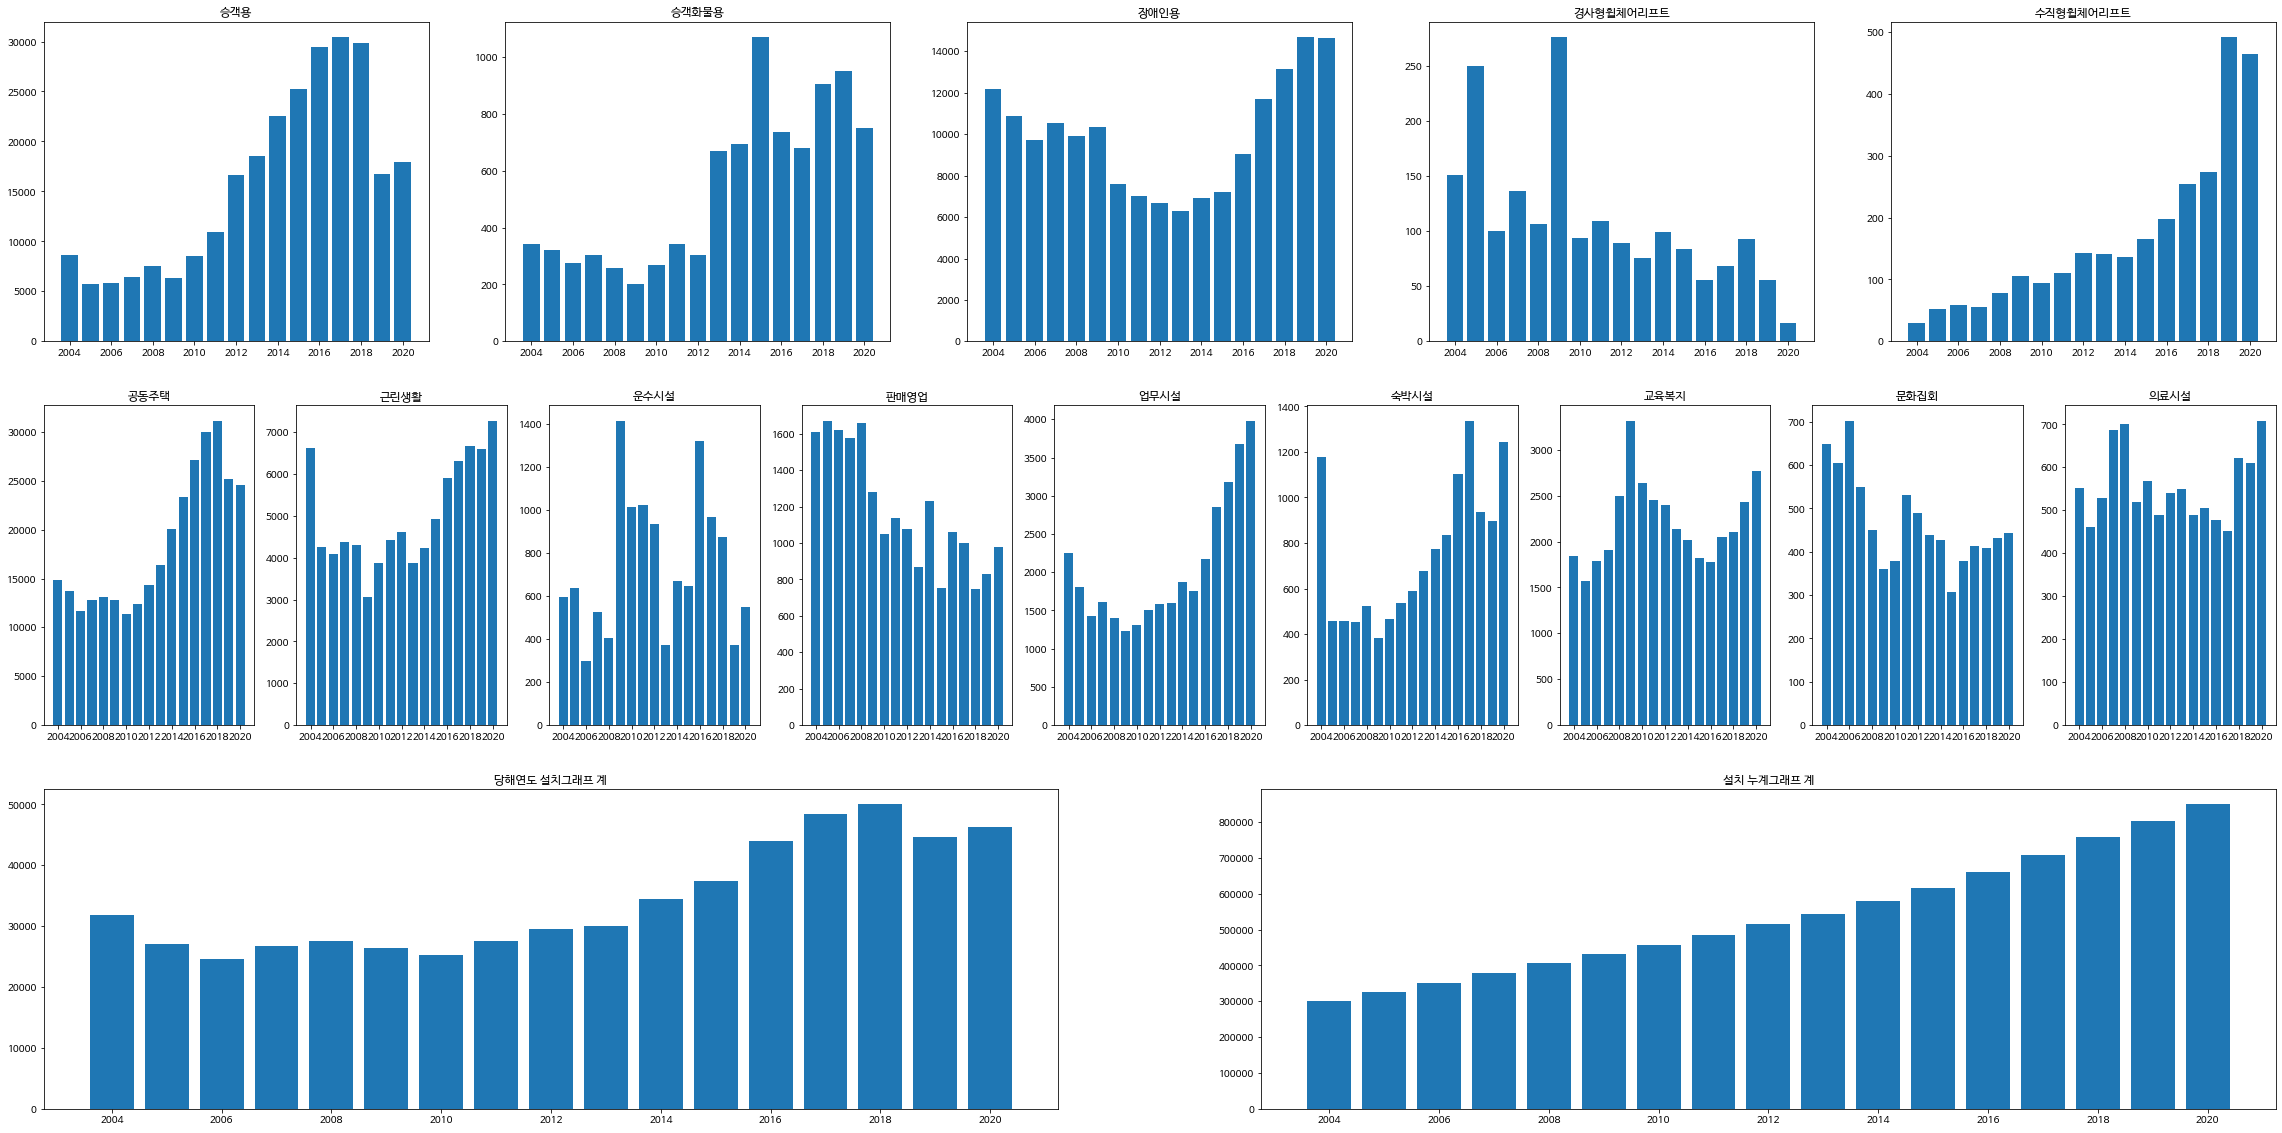

In [6]:
fig = plt.figure(figsize=(40, 20))
i = 1
domain = [sort, use, year]
for i in range(len(domain)):
    for j in range(len(domain[i].columns)):
        axs = fig.add_subplot(len(domain), len(domain[i].columns), (i*len(domain[i].columns))+j+1),
        axs[0].set_title(domain[i].columns[j])
        axs[0].bar(domain[i].index.to_series().astype(str), domain[i][domain[i].columns[j]])
        plt.xticks(sort.index.to_series().astype(str)[::2])


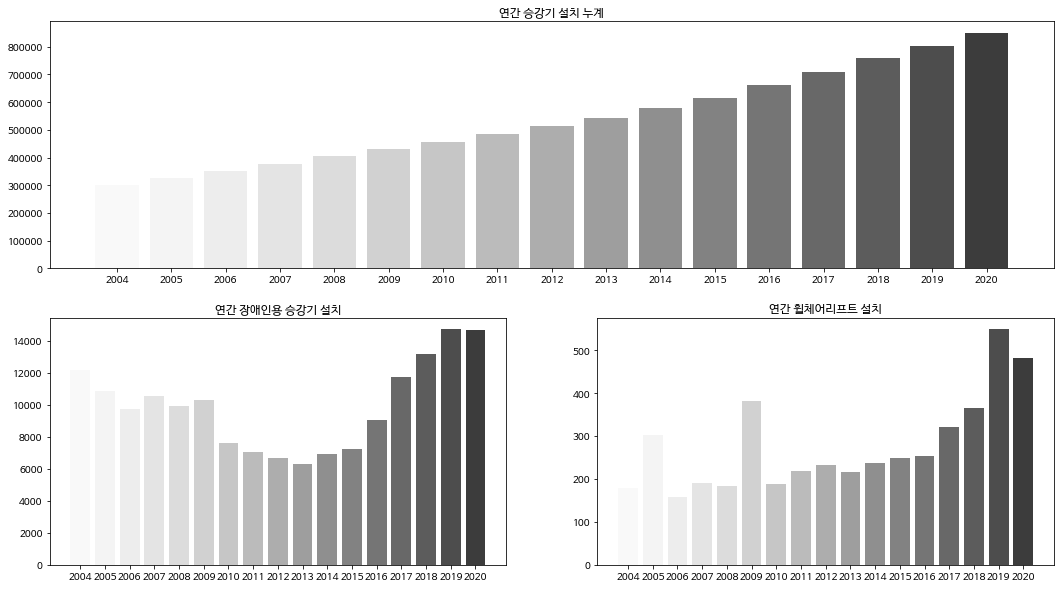

In [15]:
x = sort.index.to_series().astype(str)
palette = sns.color_palette("Greys", 20)

fig = plt.figure(figsize=(18, 10))
ax = fig.add_subplot(2, 1, 1)
ax.bar(x, year['설치 누계그래프 계'], color=palette)
ax.set_title('연간 승강기 설치 누계')
ax.xlabel("년도")
ax.ylabel("엘리단위")

ax = fig.add_subplot(2, 2, 3)
ax.bar(x, sort['장애인용'], color=palette)
ax.set_title('연간 장애인용 승강기 설치')

ax = fig.add_subplot(2, 2, 4)
ax.bar(x, sort['수직형휠체어리프트']+sort['경사형휠체어리프트'], color=palette)
ax.set_title('연간 휠체어리프트 설치')


plt.savefig('엘리베이터 설치율 시각화.png', dpi=200, facecolor='#FFFFFF')

In [16]:
sort

,승객용,승객화물용,장애인용,경사형휠체어리프트,수직형휠체어리프트
연도,,,,,
2004,8666,341,12187,151,29
2005,5787,323,10880,250,53
2006,5844,274,9732,100,59
2007,6421,304,10529,136,55
2008,7535,259,9912,106,78
2009,6361,202,10326,276,105
2010,8521,269,7601,94,95
2011,10912,343,7017,109,110
2012,16604,305,6681,89,143


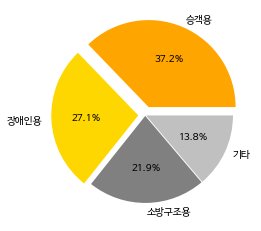

In [8]:
data = [372, 271, 219, 138]
labels = ['승객용', '장애인용', '소방구조용', '기타']

plt.pie(data, explode=[0.1, 0.08, 0.01, 0.01], colors=['orange', 'gold', 'gray', 'silver'], labels=labels, autopct='%.1f%%')
plt.savefig('엘리베이터 보급율 시각화.png', dpi=200, facecolor='#FFFFFF')